In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, silhouette_score

In [ ]:
import pandas as pd

health_d = pd.read_csv("/content/synthetic_health_data.csv")
health_d.head()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


In [ ]:
health_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [ ]:
print(health_d.isnull().sum())

Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64


In [ ]:
# prompt: I need to transform non numeric values into nummeric one

import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("pratikyuvrajchougule/health-and-lifestyle-data-for-regression")

print("Path to dataset files:", path)

health_d = pd.read_csv("/content/synthetic_health_data.csv")
#health_d.head()
#health_d.info()

# Identify non-numeric columns
non_numeric_cols = health_d.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in non_numeric_cols:
    health_d[col] = le.fit_transform(health_d[col])

# Now check the info again
health_d.info()
health_d.head()

Path to dataset files: /root/.cache/kagglehub/datasets/pratikyuvrajchougule/health-and-lifestyle-data-for-regression/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894


In [ ]:
# prompt: Remove rows that contain NaN values

health_d.dropna(inplace=True)
print(health_d.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB
None


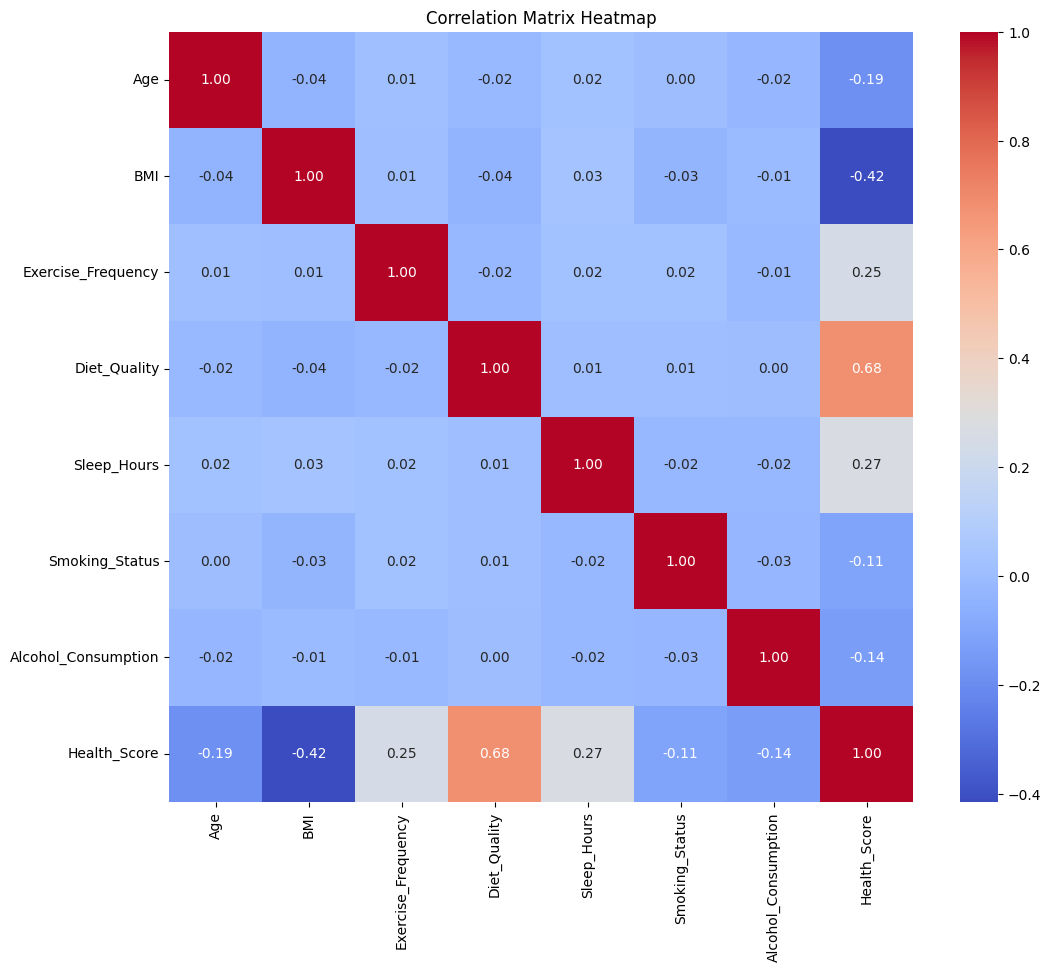

In [ ]:
# prompt: I need a correlation matrix between the columns with a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'health_d' DataFrame is already loaded as in the previous code

# Calculate the correlation matrix
correlation_matrix = health_d.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
health_d.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [ ]:
# prompt: Write a code which seperates training data from test data X and y where y is the health score and X is the rest

# Define features (X) and target variable (y)
X = health_d.drop('Health_Score', axis=1)
y = health_d['Health_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Now you have X_train, X_test, y_train, and y_test
# X_train and X_test contain the features for training and testing, respectively
# y_train and y_test contain the corresponding health scores for training and testing

In [ ]:
# prompt: Create linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 37.24188275726839
R-squared: 0.8089785388412883


In [ ]:
# prompt: I need a percentage how accurate this model is

# ... (Your existing code)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Calculate the percentage accuracy using R-squared
accuracy_percentage = r2 * 100

print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

Mean Squared Error: 37.24188275726839
R-squared: 0.8089785388412883
Accuracy Percentage: 80.90%


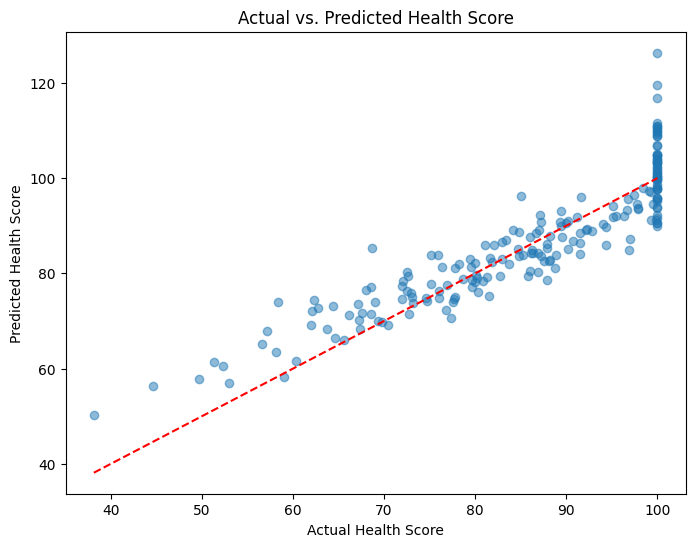

In [ ]:
# prompt: Create visualisation where you compare the actual data with the predicted one

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already calculated

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency
plt.xlabel("Actual Health Score")
plt.ylabel("Predicted Health Score")
plt.title("Actual vs. Predicted Health Score")

# Add a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

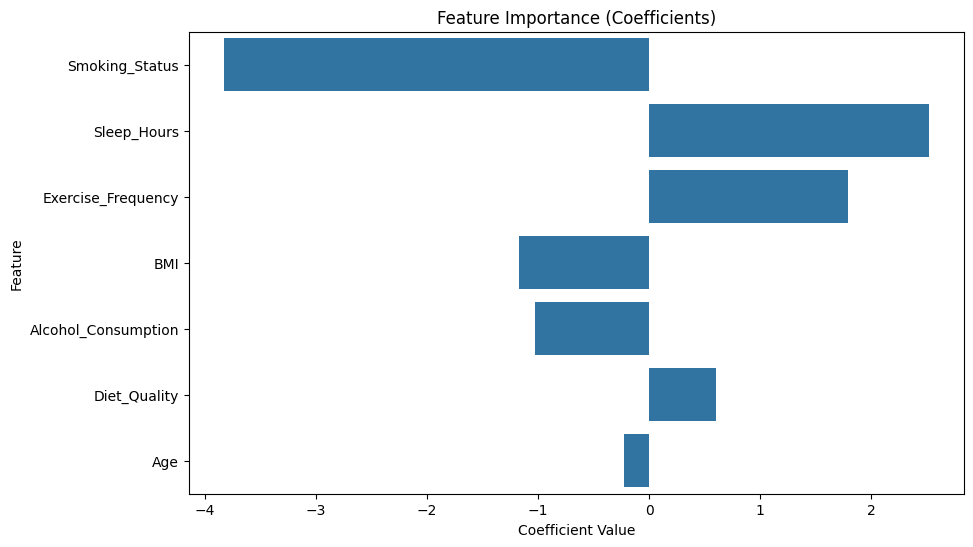

Mean Squared Error: 37.24188275726839
R-squared: 0.8089785388412883


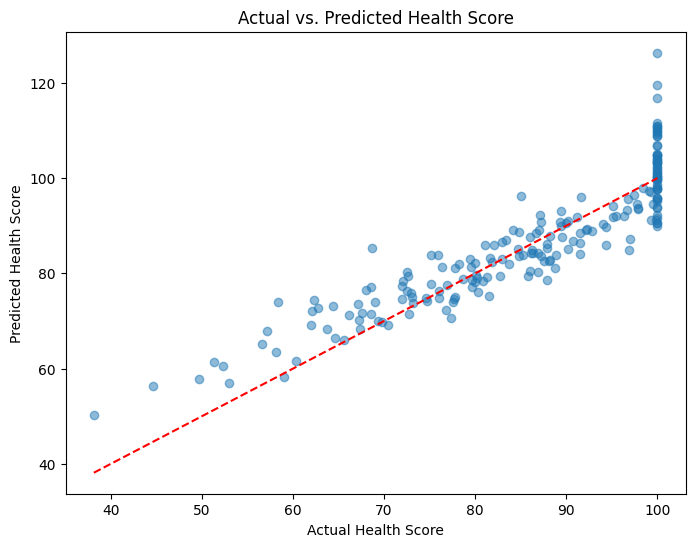

In [ ]:
# prompt: Visualize how the weights of different parameters influence the linear regression

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'health_d' DataFrame is already loaded as in the previous code

# Separate features (X) and target variable (y)
y = health_d['Health_Score']  # Assuming 'Health Score' is the column name for health scores
X = health_d.drop('Health_Score', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test


# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients (weights)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Sort coefficients by absolute value for better visualization
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)


# Visualize the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency
plt.xlabel("Actual Health Score")
plt.ylabel("Predicted Health Score")
plt.title("Actual vs. Predicted Health Score")

# Add a diagonal line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

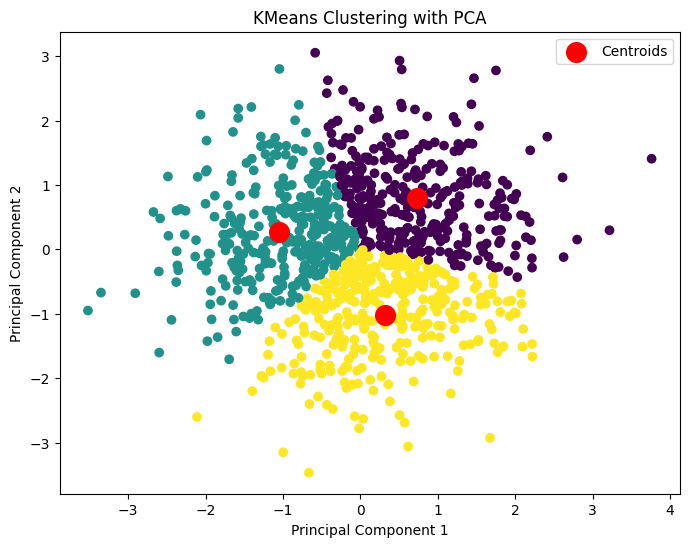

In [ ]:
# prompt: Standardize the data then Create clusters using K-means method and, reduce the number of features and visualize it with centroids in it

from sklearn.decomposition import PCA

# Assuming X_train is your standardized data (from StandardScaler)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the number of features
pca = PCA(n_components=2) # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering to the reduced data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Example with 3 clusters
kmeans.fit(X_pca)

# Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.legend()
plt.show()

In [ ]:
health_d.head()


,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score,Cluster
0,0.487759,1.332576,1.058988,-0.972277,0.215782,-0.998002,-0.117431,-1.096191,3
1,-0.161022,0.856405,1.560403,-1.878745,0.025905,1.002002,1.977489,-2.072008,9
2,0.642015,-0.011240,1.058988,0.464562,-0.622829,1.002002,0.488868,0.796489,1
3,1.536382,-0.719965,-0.445257,-1.349601,-0.771812,1.002002,0.273576,-1.772813,9
4,-0.258995,0.629303,-0.445257,-1.719677,0.619478,-0.998002,-0.114989,-1.343217,3


In [ ]:
# prompt: What are the profiles of these clusters, given the not standardized values?

# Add cluster labels to the original DataFrame
health_d['Cluster'] = kmeans.labels_

# Group data by cluster and calculate descriptive statistics for each feature
cluster_profiles = health_d.groupby('Cluster').agg(['mean', 'std'])

# Display the cluster profiles
cluster_profiles

Age                 BMI           Exercise_Frequency            \
             mean       std      mean       std               mean       std   
Cluster                                                                        
0        0.862236  0.805747 -0.075557  0.900838          -0.624662  0.885788   
1       -0.111704  0.938019 -0.474534  0.938238           0.122317  0.974820   
2       -0.906975  0.709174 -0.103842  0.878829          -0.577208  0.778377   
3        0.318490  0.964901  0.755136  0.851378          -0.169970  0.924368   
4       -0.025066  0.784854 -0.740818  0.990348           0.056158  0.944524   
5       -0.565550  0.835889  0.064209  0.915274           0.798820  0.729845   
6       -0.014153  0.757243  0.512783  0.764356           0.535288  0.904832   
7       -0.648042  0.819453  0.285470  0.787787          -0.169831  0.961839   
8        0.850333  0.759949 -0.659684  0.697221           0.080618  1.030016   
9       -0.012638  0.971716  0.459863  0.918746          -0.166693  0.948309   

        Diet_Quality           Sleep_Hours           Smoking_Status            \
                mean       std        mean       std           mean       std   
Cluster                                                                         
0           0.126681  0.582336   -0.251591  0.926150       1.002002  0.000000   
1           0.874405  0.625502    0.372734  0.946282       1.002002  0.000000   
2           0.533779  0.714126   -0.646804  0.785080      -0.971686  0.229416   
3          -1.118771  0.796386   -0.169167  0.990870      -0.998002  0.000000   
4           0.996751  0.803190   -0.049478  0.865115      -0.849066  0.527879   
5          -0.383413  0.704654    0.285314  0.979360       1.002002  0.000000   
6           0.373267  0.753601    0.923174  0.831465      -0.998002  0.000000   
7          -0.295410  0.748590   -0.332170  0.856108      -0.828988  0.560254   
8          -0.262752  0.783743    0.155402  0.873093      -0.998002  0.000000   
9          -0.875414  0.706326   -0.457739  0.919282       1.002002  0.000000   

        Alcohol_Consumption           Health_Score            
                       mean       std         mean       std  
Cluster                                                       
0                 -0.248464  0.760253    -0.378129  0.574574  
1                  0.085364  0.823203     0.863318  0.311471  
2                 -0.583522  0.770544     0.575940  0.529089  
3                 -0.120095  0.727281    -1.244558  0.667775  
4                  0.859858  0.717491     0.893252  0.297170  
5                 -0.736199  0.846994     0.281054  0.574144  
6                 -0.521054  0.777041     0.672922  0.478451  
7                  1.449778  0.626195    -0.389048  0.618975  
8                 -0.544889  0.838302     0.339066  0.638932  
9                  0.454283  0.873220    -1.384363  0.745470

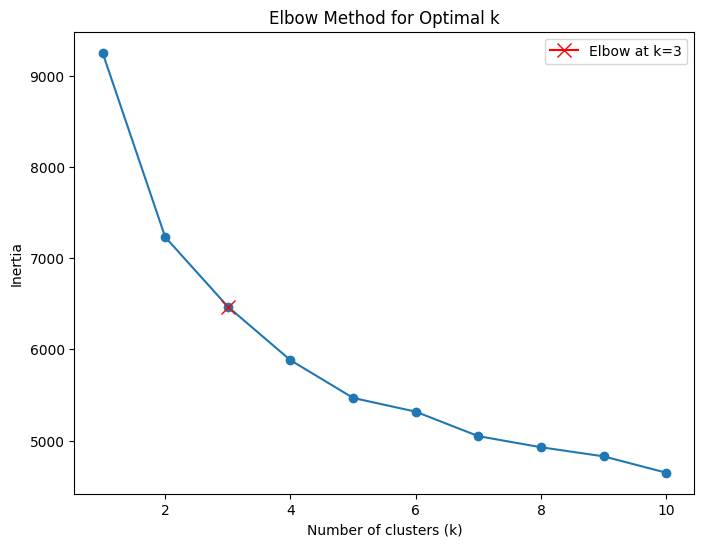

Elbow point suggests optimal k: 3


In [ ]:
# prompt: With the elbow method determine the ideal amount of clusters needed and mark it

# Calculate inertia for different cluster numbers
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")

# Mark the elbow point (you might need to adjust this based on the plot)
elbow_point = 3  # Example: visually determined from the plot
plt.plot(elbow_point, inertia[elbow_point - 1], marker='x', markersize=10, color='red', label=f'Elbow at k={elbow_point}')
plt.legend()
plt.show()

print(f"Elbow point suggests optimal k: {elbow_point}")